# Exploratory Analysis

Dataset: Neurons (Steinmetz)

In [1]:
from tqdm.notebook import tqdm
from datetime import datetime

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from app.dataset.steinmetz import load_data
from app.explore.session import session_stats
from app.explore.trial import trial_event_flow

%matplotlib inline
sns.set_style("darkgrid")

## Load Data

`all_data` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = all_data[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  

In [2]:
all_data = load_data(data_path="./data/")

Loading data.


  0%|          | 0/3 [00:00<?, ?it/s]

## Exploratory Analysis

### Stats about a single session.

In [3]:
session_stats(all_data=all_data, session_id=11)

Number of sessions = 39


Stats for a session #11: 

	Number of neurons used in this session = 698
	Number of trials in this session = 340
	Time taken per trial = 250

--------------------------------------------------

Data shapes:

	spks : (698, 340, 250)
	wheel : (340, 250)
	pupil : (3, 340, 250)
	response : (340,)
	response_time : (340,)
	bin_size :  0.01
	stim_onset :  0.5
	contrast_right : (340,)
	contrast_left : (340,)
	brain_area : (698,)
	feedback_time : (340,)
	feedback_type : (340,)
	gocue : (340,)
	trough_to_peak : (698,)
	active_trials : (450,)
	contrast_left_passive : (110,)
	contrast_right_passive : (110,)
	spks_passive : (698, 110, 250)
	pupil_passive : (3, 110, 250)
	wheel_passive : (110, 250)
	prev_reward : (340,)
	ccf : (698, 3)
	ccf_axes : 3
	cellid_orig : (1219,)
	reaction_time : (340, 2)
	face : (340, 250)
	face_passive : (110, 250)
	licks : (340, 250)
	licks_passive : (110, 250)


### Session Analysis

Exploratory analysis of the dataset on an aggregate scale across sessions.

#### Trials per mice

Total number of trials = 39




Text(0.5, 1.0, 'Trials Per Mice')

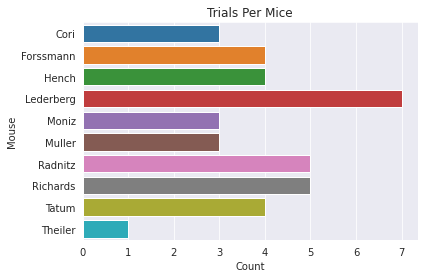

In [4]:
print(f"Total number of trials = {len([all_data[i]['mouse_name'] for i in range(len(all_data))])}\n\n")
sns.countplot(y=[all_data[i]["mouse_name"] for i in range(len(all_data))])
plt.xlabel("Count")
plt.ylabel("Mouse")
plt.title("Trials Per Mice")

#### Session dates

Text(0.5, 1.0, 'Session Dates')

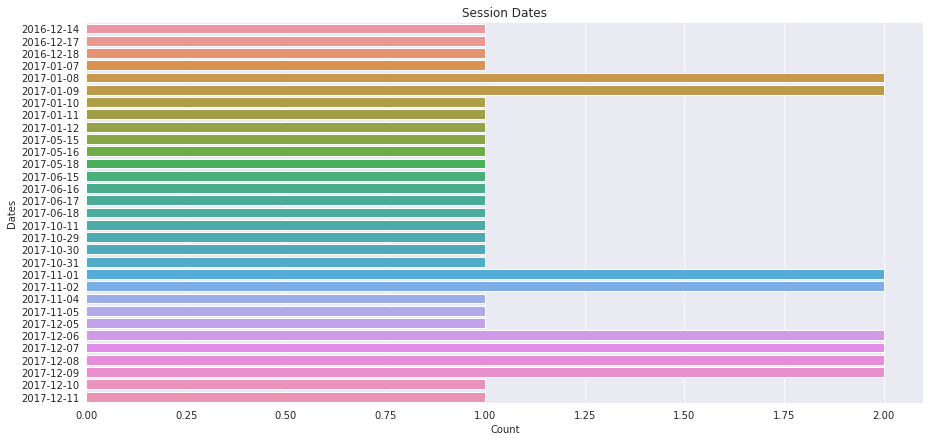

In [5]:
plt.figure(figsize=(15,7))
sns.countplot(y=sorted([datetime.strptime(all_data[i]["date_exp"], '%Y-%m-%d').date() for i in range(len(all_data))]))
plt.xlabel("Count")
plt.ylabel("Dates")
plt.title("Session Dates")

#### Trials per session

Text(0.5, 1.0, 'Trials Per Session')

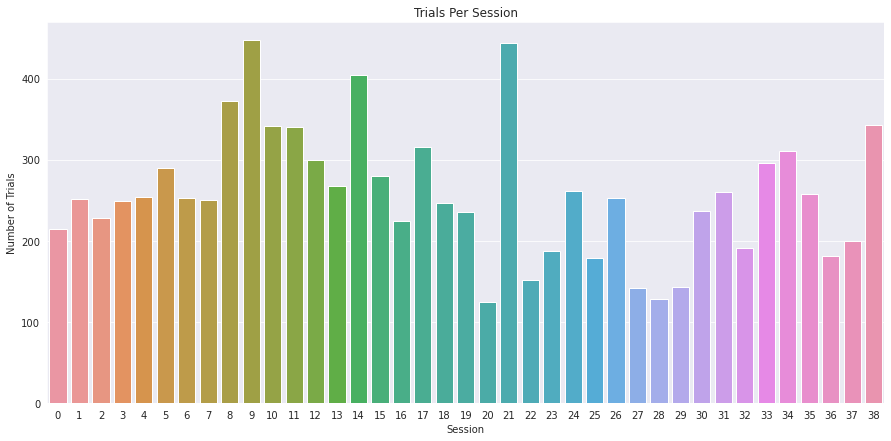

In [6]:
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(all_data)), 
            y = [all_data[i]["response"].shape[0] for i in range(len(all_data))]
           )

plt.xlabel("Session")
plt.ylabel("Number of Trials")
plt.title("Trials Per Session")

#### Number of neurons used per session

Text(0.5, 1.0, 'Neurons Per Session')

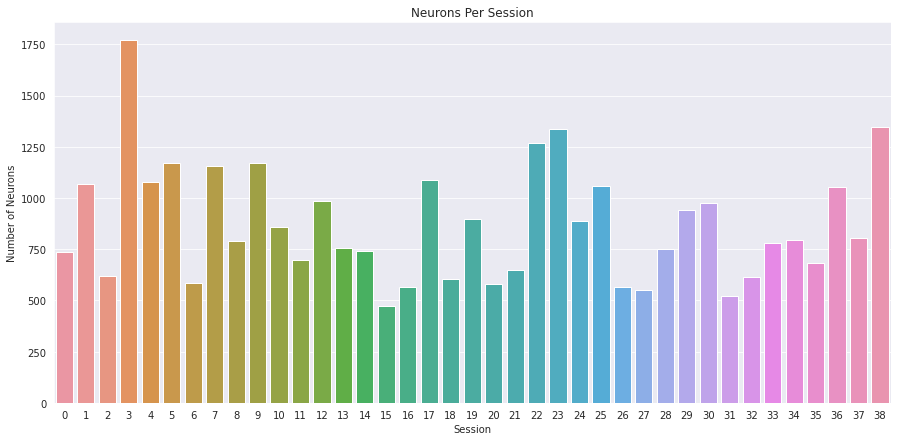

In [7]:
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(all_data)), 
            y = [all_data[i]["spks"].shape[0] for i in range(len(all_data))]
           )

plt.xlabel("Session")
plt.ylabel("Number of Neurons")
plt.title("Neurons Per Session")

#### Number of brain areas per session

Each neuron belongs to a brain area. Each brain areas belongs to a brain region. There are a total 7 brain regions.

Text(0.5, 1.0, 'Brain Areas Per Session')

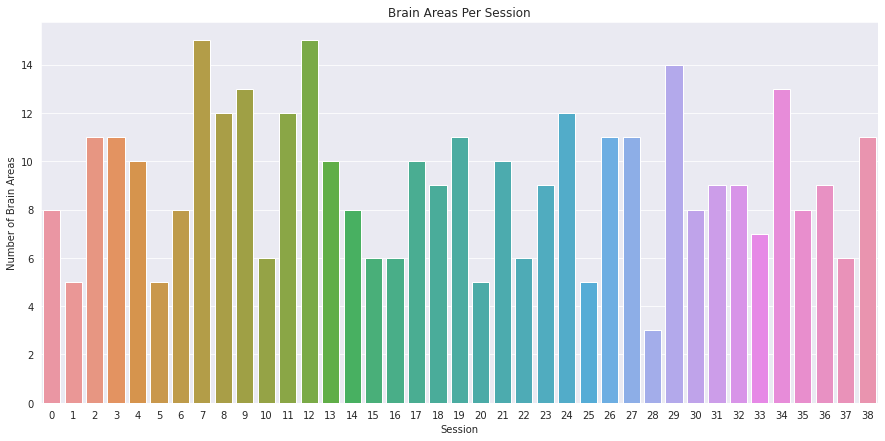

In [8]:
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(all_data)), 
            y = [len(np.unique(all_data[i]["brain_area"])) for i in range(len(all_data))]
           )

plt.xlabel("Session")
plt.ylabel("Number of Brain Areas")
plt.title("Brain Areas Per Session")

#### Most used brain areas across all sessions

Number of unique brain areas across all sessions = 73


  0%|          | 0/39 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Most Used Brain Areas')

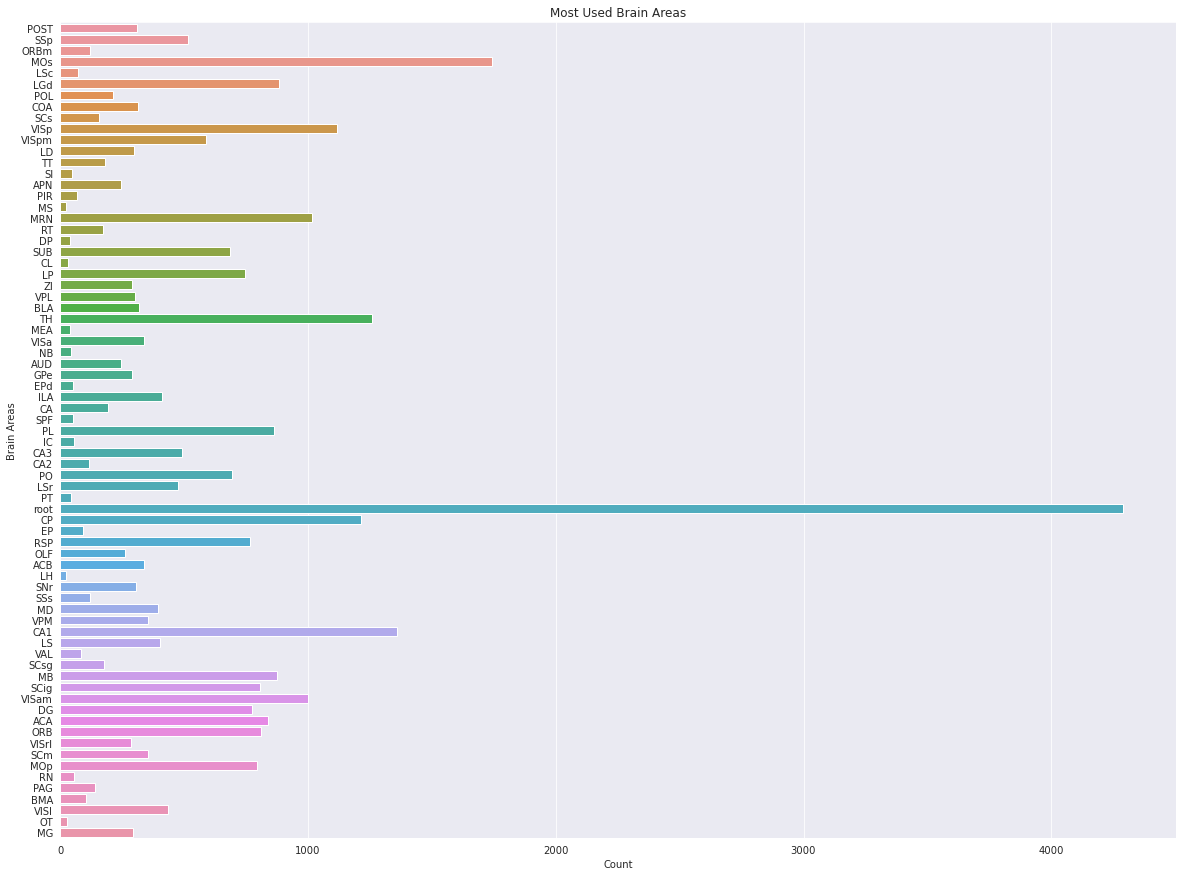

In [9]:
all_brain_areas = []
for i in range(len(all_data)):
    for ba in np.unique(all_data[i]["brain_area"]).tolist():
        all_brain_areas.append(ba)
        
all_brain_areas = list(set(all_brain_areas))
print(f"Number of unique brain areas across all sessions = {len(all_brain_areas)}")

brain_areas_count = {k: 0 for k in all_brain_areas}

for i in tqdm(range(len(all_data))):
    for ba in all_data[i]["brain_area"]:
        brain_areas_count[ba] += 1
        
plt.figure(figsize=(20, 15))
sns.barplot(y = list(brain_areas_count.keys()), x=list(brain_areas_count.values()))
plt.xlabel("Count")
plt.ylabel("Brain Areas")
plt.title("Most Used Brain Areas")

#### Most used brain regions

Text(0.5, 1.0, 'Most Used Brain Regions')

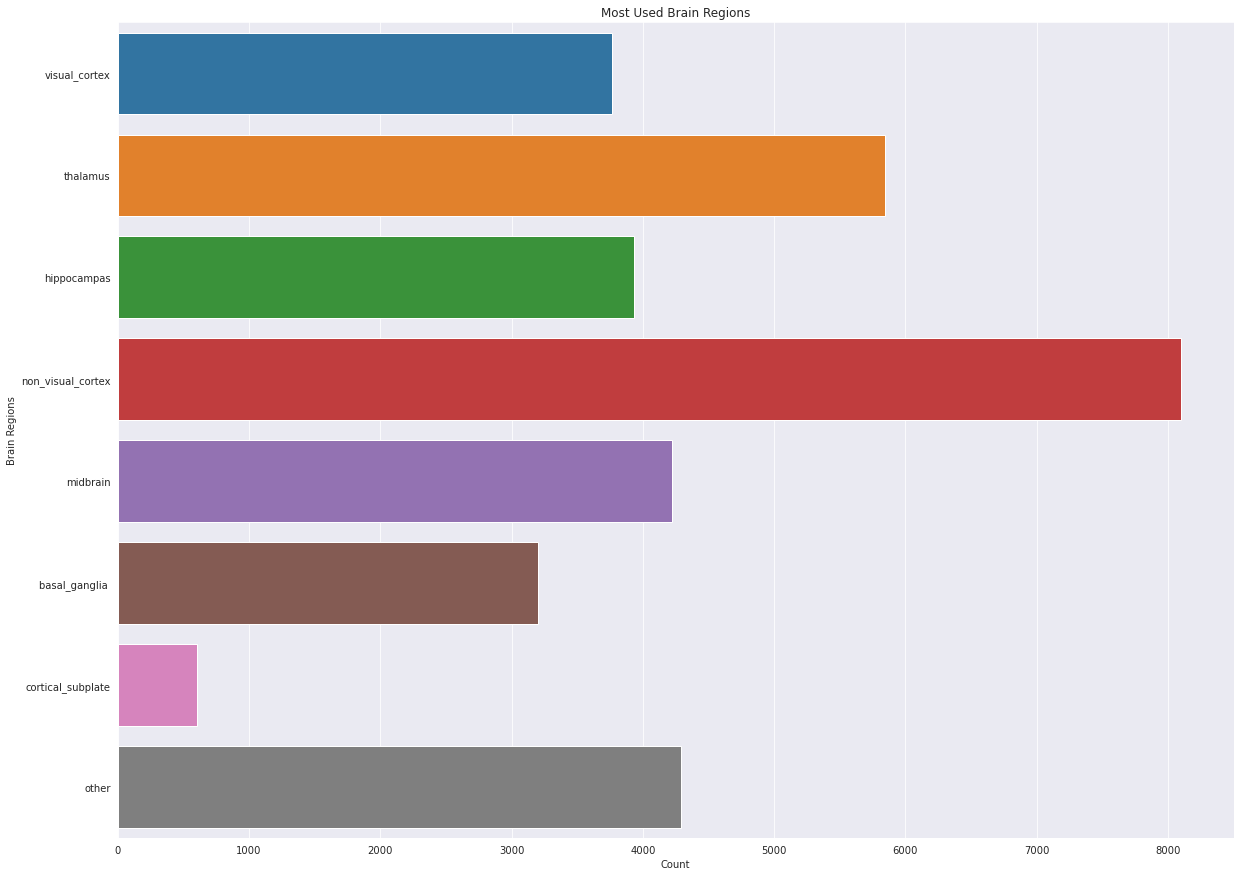

In [10]:
all_brain_regions = {
    "visual_cortex": ["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"],
    "thalamus": ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"],
    "hippocampas": ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],
    "non_visual_cortex": ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"],
    "midbrain": ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"],
    "basal_ganglia ": ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"],
    "cortical_subplate": ["BLA", "BMA", "EP", "EPd", "MEA"],
    "other": ["root"]
}

brain_regions_count = {k:0 for k in all_brain_regions.keys()}

for ba in brain_areas_count:
    for br in all_brain_regions:
        if ba in all_brain_regions[br]:
            brain_regions_count[br] += brain_areas_count[ba]


plt.figure(figsize=(20, 15))
sns.barplot(y = list(brain_regions_count.keys()), x=list(brain_regions_count.values()))
plt.xlabel("Count")
plt.ylabel("Brain Regions")
plt.title("Most Used Brain Regions")

### Trial Analysis

For a single trial in a session:

> `time starts` => `stimulus shown` => `gocue` => `response` => `feedback` => `time_ends`

#### Event flow for a single trial

In [11]:
trial_event_flow(all_data=all_data, session_id=11, trial_id=9)

Session number = 11
Trial number = 9/340
Contrast left: 0.25
Contrast Right: 1.0
Response: -1.0
Feedback: 1.0


Time     - Action    
------------------------------------
0        - start     
0.5      - stim_onset (always fixed)
0.948    - gocue     
1.059    - response_time
1.096    - feedback_time
NA       - end       


#### Go cue, response, and feedback time variability within a session

Text(0.5, 0, 'Time (seconds)')

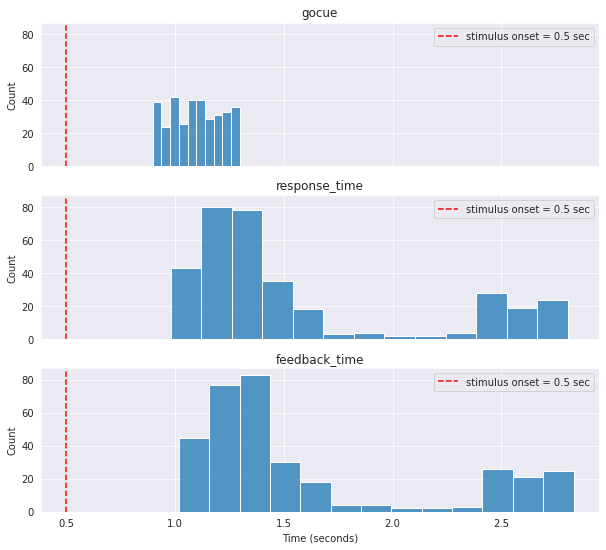

In [12]:
session_data=all_data[11]

time_keys = ["gocue", "response_time", "feedback_time"]

fig, axes = plt.subplots(nrows=len(time_keys), ncols=1, figsize=(10,9), sharex=True, sharey=True)
for i in range(len(time_keys)):
    sns.histplot(session_data[time_keys[i]], ax=axes[i]).set_title(time_keys[i])
    axes[i].axvline(0.5, color='r', linestyle='--', label="stimulus onset = 0.5 sec")
    axes[i].legend()
    
plt.xlabel("Time (seconds)")